### Read dataset

In [12]:
import pandas as pd

df = pd.read_csv('Datasets/1.6_million_dataset_labelled_LogReg.csv')

df.head()

,date,stemmed_text,sentiment,predicted_label
0,2009-04-06 22:19:45,"['awww', 'bummer', 'shoulda', 'david', 'carr',...",Negative,0
1,2009-04-06 22:19:49,"['upset', 'updat', 'facebook', 'text', 'result...",Negative,0
2,2009-04-06 22:19:53,"['dive', 'time', 'ball', 'manag', 'save', '50'...",Negative,0
3,2009-04-06 22:19:57,"['bodi', 'feel', 'itchi']",Negative,0
4,2009-04-06 22:19:57,"['behav', 'mad']",Negative,0


### Read from original dataset

In [13]:
headers = ['target', 'ids', 'date', 'flag', 'user', 'text']
df2 = pd.read_csv('Datasets/training.1600000.processed.noemoticon.csv', names=headers, encoding='latin-1')

df2.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Transfer text column into Log_reg classified dataset

In [14]:
df['text'] = df2['text']

df.head()

,date,stemmed_text,sentiment,predicted_label,text
0,2009-04-06 22:19:45,"['awww', 'bummer', 'shoulda', 'david', 'carr',...",Negative,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,2009-04-06 22:19:49,"['upset', 'updat', 'facebook', 'text', 'result...",Negative,0,is upset that he can't update his Facebook by ...
2,2009-04-06 22:19:53,"['dive', 'time', 'ball', 'manag', 'save', '50'...",Negative,0,@Kenichan I dived many times for the ball. Man...
3,2009-04-06 22:19:57,"['bodi', 'feel', 'itchi']",Negative,0,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,"['behav', 'mad']",Negative,0,"@nationwideclass no, it's not behaving at all...."


### Clean text

In [15]:
import re

# Text cleaning function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase the text
    text = text.lower()
    return text

# Apply the text cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

In [16]:
df.head()

,date,stemmed_text,sentiment,predicted_label,text,cleaned_text
0,2009-04-06 22:19:45,"['awww', 'bummer', 'shoulda', 'david', 'carr',...",Negative,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...
1,2009-04-06 22:19:49,"['upset', 'updat', 'facebook', 'text', 'result...",Negative,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,2009-04-06 22:19:53,"['dive', 'time', 'ball', 'manag', 'save', '50'...",Negative,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,2009-04-06 22:19:57,"['bodi', 'feel', 'itchi']",Negative,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,"['behav', 'mad']",Negative,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


### Separate tweets into depressive vs. non-depressive

In [17]:
depressive_tweets = df[df['predicted_label'] == 1]

normal_tweets = df[df['predicted_label'] == 0]

print('Number of depressive tweets:', len(depressive_tweets))
print('Number of normal tweets:', len(normal_tweets))

Number of depressive tweets: 48418
Number of normal tweets: 1551582


### Create a dataframe of economic keywords

In [18]:
file_path = 'economic_keywords.txt'

with open(file_path, 'r') as file:
    economic_keywords = file.read().split('\n')

economic_keywords_df = pd.DataFrame(economic_keywords, columns=['keyword'])

economic_keywords_df.head()

,keyword
0,unemployment
1,job loss
2,layoff
3,fired
4,job cuts


### Apply economic keywords onto depressive and normal tweets

In [19]:
depressive_tweets['economic_keywords'] = depressive_tweets['cleaned_text'].apply(lambda x: any([k in x for k in economic_keywords]))
normal_tweets['economic_keywords'] = normal_tweets['cleaned_text'].apply(lambda x: any([k in x for k in economic_keywords]))

print('Number of depressive tweets with economic keywords:', len(depressive_tweets[depressive_tweets['economic_keywords'] == True]))
print('Number of normal tweets with economic keywords:', len(normal_tweets[normal_tweets['economic_keywords'] == True]))

C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\160213231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_tweets['economic_keywords'] = depressive_tweets['cleaned_text'].apply(lambda x: any([k in x for k in economic_keywords]))


Number of depressive tweets with economic keywords: 1349
Number of normal tweets with economic keywords: 33394


C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\160213231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_tweets['economic_keywords'] = normal_tweets['cleaned_text'].apply(lambda x: any([k in x for k in economic_keywords]))


### Percentage of economic keywords that appear in depressive vs non depressive tweets

In [ ]:
total_depressive_tweets = len(depressive_tweets)
total_normal_tweets = len(normal_tweets)

depressive_keywords_count = len(depressive_tweets[depressive_tweets['economic_keywords'] == True])
normal_keywords_count = len(normal_tweets[normal_tweets['economic_keywords'] == True])

depressive_keywords_percentage = (depressive_keywords_count / total_depressive_tweets) * 100
normal_keywords_percentage = (normal_keywords_count / total_normal_tweets) * 100

print('Percentage of depressive tweets with economic keywords:', depressive_keywords_percentage)
print('Percentage of normal tweets with economic keywords:', normal_keywords_percentage)

Percentage of depressive tweets with economic keywords: 2.7861539097030033
Percentage of normal tweets with economic keywords: 2.1522549243288465


In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = [
    [depressive_keywords_count, total_depressive_tweets - depressive_keywords_count],
    [normal_keywords_count, total_normal_tweets - normal_keywords_count]
]

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Determine if the result is statistically significant
alpha = 0.05
if p < alpha:
    print("The increase in percentage of depressive tweets with economic keywords is statistically significant.")
else:
    print("The increase in percentage of depressive tweets with economic keywords is not statistically significant.")

Chi-square statistic: 88.5173324410575
P-value: 5.0391406259627165e-21
The increase in percentage of depressive tweets with economic keywords is statistically significant.


In [28]:
# Calculate the odds of economic keyword usage in depressive tweets
odds_depressive = depressive_keywords_count / (total_depressive_tweets - depressive_keywords_count)

# Calculate the odds of economic keyword usage in normal tweets
odds_normal = normal_keywords_count / (total_normal_tweets - normal_keywords_count)

# Calculate the odds ratio
odds_ratio = odds_depressive / odds_normal

print(f"Odds ratio of economic keyword usage in depressive tweets vs normal tweets: {odds_ratio}")

Odds ratio of economic keyword usage in depressive tweets vs normal tweets: 1.302969019168686


Overall percentage of economic keywords appearing in normal and depressive tweets are quite low.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the cleaned text
X = vectorizer.fit_transform(depressive_tweets['cleaned_text'])

# Convert the result to a DataFrame for better readability
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()


,10,12,15,1st,20,21,22,24,25,26,...,years,yes,yesterday,youll,youre,youve,yr,yrs,yup,zomg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It is peculiar and weird to have these words as indicators of depression, let's try another method.

### Use sklearn LDA to identify dominant topics

In [24]:
# Define the number of topics and passes
num_topics = 5
passes = 10

# Initialize the LDA model
lda_sklearn = LatentDirichletAllocation(n_components=num_topics, max_iter=passes, random_state=42)

# Fit the LDA model to the TF-IDF matrix
lda_sklearn.fit(X)

# Display the topics
for idx, topic in enumerate(lda_sklearn.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {idx}: {' '.join(topic_words)}")

Topic 0: im depressed like feel really just know pain dont right
Topic 1: im depressing day today got hate just live home thanks
Topic 2: killing tonight im just fail nope good new head pretty
Topic 3: work tired day im ready bed tomorrow getting today looking
Topic 4: just dont life im feel hope love better time kill


### Now performing LDA on normal tweets as well

In [25]:
# Fit and transform the cleaned text of normal tweets
X_normal = vectorizer.fit_transform(normal_tweets['cleaned_text'])

# Convert the result to a DataFrame for better readability
tfidf_df_normal = pd.DataFrame(X_normal.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df_normal.head()

,10,100,11,12,15,1st,20,2day,2nd,30,...,yesterday,yo,youll,young,youre,youtube,youve,yum,yummy,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Initialize the LDA model
lda_sklearn_normal = LatentDirichletAllocation(n_components=num_topics, max_iter=passes, random_state=42)

# Fit the LDA model to the TF-IDF matrix
lda_sklearn_normal.fit(X_normal)

# Display the topics
for idx, topic in enumerate(lda_sklearn_normal.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {idx}: {' '.join(topic_words)}")


Topic 0: good love night im day lol tomorrow tired bed yeah
Topic 1: thanks work morning today day going want good im fun
Topic 2: miss im twitter dont hey sorry just think know follow
Topic 3: im watching wait hate yes school just happy new movie
Topic 4: just like thank know got im lost need really help


In [29]:
# Get the topic distribution for depressive tweets
depressive_topic_distribution = lda_sklearn.transform(X)

# Get the topic distribution for normal tweets
normal_topic_distribution = lda_sklearn_normal.transform(X_normal)

# Calculate the proportion of tweets assigned to each topic for depressive tweets
depressive_topic_proportions = depressive_topic_distribution.sum(axis=0) / depressive_topic_distribution.shape[0]

# Calculate the proportion of tweets assigned to each topic for normal tweets
normal_topic_proportions = normal_topic_distribution.sum(axis=0) / normal_topic_distribution.shape[0]

# Print the proportions
print("Proportion of tweets assigned to each topic within depressive tweets:")
for i, proportion in enumerate(depressive_topic_proportions):
    print(f"Topic {i}: {proportion:.4f}")

print("\nProportion of tweets assigned to each topic within normal tweets:")
for i, proportion in enumerate(normal_topic_proportions):
    print(f"Topic {i}: {proportion:.4f}")

Proportion of tweets assigned to each topic within depressive tweets:
Topic 0: 0.1960
Topic 1: 0.1869
Topic 2: 0.1720
Topic 3: 0.2342
Topic 4: 0.2109

Proportion of tweets assigned to each topic within normal tweets:
Topic 0: 0.1939
Topic 1: 0.2049
Topic 2: 0.2007
Topic 3: 0.2013
Topic 4: 0.1992


### Topic Analysis

**Topic 3 for depressive tweets seems to be most prevalent:**

**Topic 3:** work tired day im ready bed tomorrow getting today looking

**And the most prevalent topic for normal tweets is topic 1:**

**Topic 1:** thanks work morning today day going want good im fun

There is a common theme between these two, loosely relating to "work".

In [31]:
# Get the topic with the highest proportion for each tweet
depressive_tweets['dominant_topic'] = depressive_topic_distribution.argmax(axis=1)
normal_tweets['dominant_topic'] = normal_topic_distribution.argmax(axis=1)

# Filter tweets that belong to topic 3 for depressive tweets
depressive_topic_3_tweets = depressive_tweets[depressive_tweets['dominant_topic'] == 3]

# Filter tweets that belong to topic 1 for normal tweets
normal_topic_1_tweets = normal_tweets[normal_tweets['dominant_topic'] == 1]


C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\3007912607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_tweets['dominant_topic'] = depressive_topic_distribution.argmax(axis=1)
C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\3007912607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_tweets['dominant_topic'] = normal_topic_distribution.argmax(axis=1)


In [37]:
# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)

# Display some sample tweets
print("Sample tweets for depressive topic 3:")
print(depressive_topic_3_tweets['text'].sample(10).to_string(index=False))

print("\nSample tweets for normal topic 1:")
print(normal_topic_1_tweets['text'].sample(10).to_string(index=False))

Sample tweets for depressive topic 3:
    @kgreen83 sorry i disappeared on msn it's being an arse it signs me in and then crashes grrr!! speak to ye soon if it decides to work 
                                        sigh. work still piling on....must get through thisssssssssss. can't have another repeat of today 
                                                                           Hate. Thiz. I'm. Grounded. Off. Computer. For. The. Whole. Day 
                                           On my way into the dreaded college to catch up on work that should have been finished long ago 
                                                              Crazy decisions were made today.   things are getting a bit wild aroud here.
                                     Applying for a job at @sega today... Everything is crossed in the vain hope of getting it. #DreamJob 
                                                                                                                      demotivate

### I want to explore more on the extreme topics like self harm ideation and emotional pain

In [38]:
self_harm_keywords_file_path = 'self_harm_ideation.txt'

with open(self_harm_keywords_file_path, 'r') as file:
    self_harm_keywords = file.read().split('\n')

self_harm_keywords_df = pd.DataFrame(self_harm_keywords, columns=['keyword'])

self_harm_keywords_df.head()

,keyword
0,self-harm
1,cutting
2,hurt myself
3,self-injury
4,self-inflicted


In [40]:
depressive_tweets['self_harm_keywords'] = depressive_tweets['cleaned_text'].apply(lambda x: any([k in x for k in self_harm_keywords]))

C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\344793855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_tweets['self_harm_keywords'] = depressive_tweets['cleaned_text'].apply(lambda x: any([k in x for k in self_harm_keywords]))


In [42]:
print('Number of depressive tweets with self-harm keywords:', len(depressive_tweets[depressive_tweets['self_harm_keywords'] == True]))
print('Number of total depressive tweets:', len(depressive_tweets))
print('Percentage of depressive tweets with self-harm keywords:', (len(depressive_tweets[depressive_tweets['self_harm_keywords'] == True]) / len(depressive_tweets)) * 100)

Number of depressive tweets with self-harm keywords: 8517
Number of total depressive tweets: 48418
Percentage of depressive tweets with self-harm keywords: 17.590565492172335


In [43]:
emotional_pain_keywords_file_path = 'emotional_pain.txt'

with open(emotional_pain_keywords_file_path, 'r') as file:
    emotional_pain_keywords = file.read().split('\n')
    

emotional_pain_keywords_df = pd.DataFrame(emotional_pain_keywords, columns=['keyword'])

emotional_pain_keywords_df.head()

,keyword
0,depressed
1,depression
2,sad
3,sadness
4,pain


In [44]:
depressive_tweets['emotional_pain_keywords'] = depressive_tweets['cleaned_text'].apply(lambda x: any([k in x for k in emotional_pain_keywords]))

C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\2460972852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_tweets['emotional_pain_keywords'] = depressive_tweets['cleaned_text'].apply(lambda x: any([k in x for k in emotional_pain_keywords]))


In [45]:
print('Number of depressive tweets with emotional pain keywords:', len(depressive_tweets[depressive_tweets['emotional_pain_keywords'] == True]))
print('Number of total depressive tweets:', len(depressive_tweets))
print('Percentage of depressive tweets with emotional pain keywords:', (len(depressive_tweets[depressive_tweets['emotional_pain_keywords'] == True]) / len(depressive_tweets)) * 100)

Number of depressive tweets with emotional pain keywords: 7717
Number of total depressive tweets: 48418
Percentage of depressive tweets with emotional pain keywords: 15.938287413771738


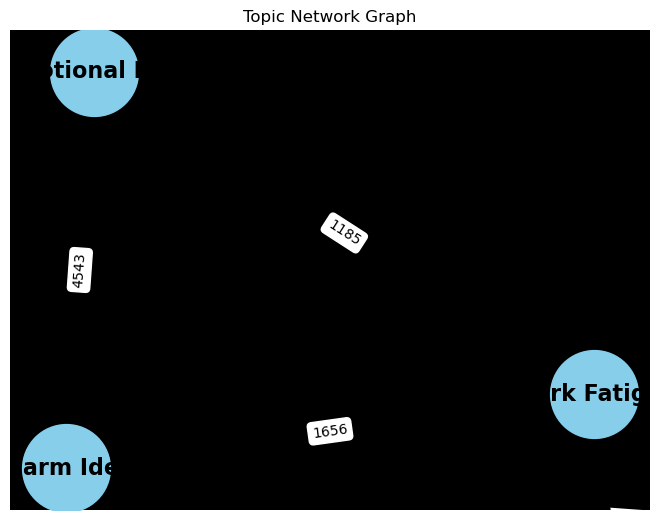

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes for each topic
G.add_node('Work Fatigue')
G.add_node('Self-Harm Ideation')
G.add_node('Emotional Pain')

# Add edges based on co-occurrence in the same tweet
for index, row in depressive_tweets.iterrows():
    topics = []
    if row['dominant_topic'] == 3:
        topics.append('Work Fatigue')
    if row['self_harm_keywords']:
        topics.append('Self-Harm Ideation')
    if row['emotional_pain_keywords']:
        topics.append('Emotional Pain')
    
    for i in range(len(topics)):
        for j in range(i + 1, len(topics)):
            if G.has_edge(topics[i], topics[j]):
                G[topics[i]][topics[j]]['weight'] += 1
            else:
                G.add_edge(topics[i], topics[j], weight=1)

# Draw the graph
pos = nx.spring_layout(G, k=1.5)  # Adjust layout for better spacing
weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]  # Scale up edge thickness for visibility

# Draw nodes, edges, and labels
# Draw the graph with adjustments for label and node size
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=16, font_weight='bold', width=weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_size=10)


plt.title('Topic Network Graph')
plt.show()


In [53]:
# Filter tweets that belong to topic 3 for depressive tweets
depressive_topic_3_tweets = depressive_tweets[depressive_tweets['dominant_topic'] == 3]

# Display some sample tweets
print("Sample tweets for depressive topic 3:")
print(depressive_topic_3_tweets['text'].sample(10).to_string(index=False))

# Calculate the number of depressive tweets with self-harm keywords in topic 3
depressive_topic_3_tweets['self_harm_keywords'] = depressive_topic_3_tweets['cleaned_text'].apply(lambda x: any([k in x for k in self_harm_keywords]))

# Calculate the number of depressive tweets with emotional pain keywords in topic 3
depressive_topic_3_tweets['emotional_pain_keywords'] = depressive_topic_3_tweets['cleaned_text'].apply(lambda x: any([k in x for k in emotional_pain_keywords]))

# Print the counts and percentages
print('Number of depressive tweets with self-harm keywords in topic 3:', len(depressive_topic_3_tweets[depressive_topic_3_tweets['self_harm_keywords'] == True]))
print('Number of total depressive tweets in topic 3:', len(depressive_topic_3_tweets))
print('Percentage of depressive tweets with self-harm keywords in topic 3:', (len(depressive_topic_3_tweets[depressive_topic_3_tweets['self_harm_keywords'] == True]) / len(depressive_topic_3_tweets)) * 100)

print('Number of depressive tweets with emotional pain keywords in topic 3:', len(depressive_topic_3_tweets[depressive_topic_3_tweets['emotional_pain_keywords'] == True]))
print('Number of total depressive tweets in topic 3:', len(depressive_topic_3_tweets))
print('Percentage of depressive tweets with emotional pain keywords in topic 3:', (len(depressive_topic_3_tweets[depressive_topic_3_tweets['emotional_pain_keywords'] == True]) / len(depressive_topic_3_tweets)) * 100)

Sample tweets for depressive topic 3:
                                                                                                                  Worky Worky Work. OVER. 
                                                                i am sittn here in my rainy hometown, while my sister traveled to tunesia 
I'm off to get things ready for the bbq +cocktails tonight...shall be on prob at around 9.30  kisskiss to you all!! Have a lovely eve xxxx
               And oh fucksticks, it's fathers day tomorrow isn't it =\ Titty-wanking-shit-potatoes. Can you tell I might have forgotten? 
                                                                              getting ready for work.. dont wanna go  just kill me now aha
                                                     Not feeling well today...horrible headache...feels like tension...in bed, laying low 
                                                                        Had a dead good day. Hope the weather turns out the same

C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\1021579700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_topic_3_tweets['self_harm_keywords'] = depressive_topic_3_tweets['cleaned_text'].apply(lambda x: any([k in x for k in self_harm_keywords]))
C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\1021579700.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_topic_3_tweets['emotional_pain_keywords'] = depressive_topic_3_tweets['cleaned_text'].apply(lambda x: any([k in x for k in 

Number of depressive tweets with self-harm keywords in topic 3: 1656
Number of total depressive tweets in topic 3: 12135
Percentage of depressive tweets with self-harm keywords in topic 3: 13.646477132262053
Number of depressive tweets with emotional pain keywords in topic 3: 1185
Number of total depressive tweets in topic 3: 12135
Percentage of depressive tweets with emotional pain keywords in topic 3: 9.765142150803461


In [56]:
# Create binary indicators for the presence of each stressor
depressive_tweets['work_fatigue'] = depressive_tweets['dominant_topic'] == 3
depressive_tweets['emotional_pain'] = depressive_tweets['emotional_pain_keywords']
depressive_tweets['self_harm_ideation'] = depressive_tweets['self_harm_keywords']

# Create contingency tables
contingency_tables = {}
stressors = ['work_fatigue', 'emotional_pain', 'self_harm_ideation']

for stressor in stressors:
    contingency_tables[stressor] = pd.crosstab(depressive_tweets['economic_keywords'], depressive_tweets[stressor])

# Calculate co-occurrence rates
co_occurrence_rates = {}

for stressor in stressors:
    economic_and_stressor = contingency_tables[stressor].loc[True, True]
    total_economic = contingency_tables[stressor].loc[True].sum()
    co_occurrence_rates[stressor] = economic_and_stressor / total_economic

# Print the results
for stressor, rate in co_occurrence_rates.items():
    print(f"Proportion of depressive tweets mentioning economic keywords that also mention {stressor.replace('_', ' ')}: {rate:.2%}")

Proportion of depressive tweets mentioning economic keywords that also mention work fatigue: 25.20%
Proportion of depressive tweets mentioning economic keywords that also mention emotional pain: 19.13%
Proportion of depressive tweets mentioning economic keywords that also mention self harm ideation: 23.87%


C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\2707824225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_tweets['work_fatigue'] = depressive_tweets['dominant_topic'] == 3
C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\2707824225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressive_tweets['emotional_pain'] = depressive_tweets['emotional_pain_keywords']
C:\Users\shaun\AppData\Local\Temp\ipykernel_18452\2707824225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [57]:
from scipy.stats import chi2_contingency

# Initialize a dictionary to store the results
chi2_results = {}
odds_ratios = {}

# Perform chi-square tests and compute odds ratios for each stressor
for stressor in stressors:
    # Get the contingency table for the current stressor
    table = contingency_tables[stressor]
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(table)
    chi2_results[stressor] = {'chi2': chi2, 'p-value': p, 'dof': dof, 'expected': expected}
    
    # Calculate the odds of the stressor occurring in tweets with economic keywords
    odds_with_economic = table.loc[True, True] / table.loc[True, False]
    
    # Calculate the odds of the stressor occurring in tweets without economic keywords
    odds_without_economic = table.loc[False, True] / table.loc[False, False]
    
    # Calculate the odds ratio
    odds_ratio = odds_with_economic / odds_without_economic
    odds_ratios[stressor] = odds_ratio

# Print the chi-square test results and odds ratios
for stressor in stressors:
    print(f"Chi-square test results for {stressor.replace('_', ' ')}:")
    print(f"Chi-square statistic: {chi2_results[stressor]['chi2']}")
    print(f"P-value: {chi2_results[stressor]['p-value']}")
    print(f"Degrees of freedom: {chi2_results[stressor]['dof']}")
    print(f"Expected frequencies: \n{chi2_results[stressor]['expected']}\n")
    print(f"Odds ratio for {stressor.replace('_', ' ')}: {odds_ratios[stressor]}\n")

Chi-square test results for work fatigue:
Chi-square statistic: 0.007960220488792597
P-value: 0.9289070172211349
Degrees of freedom: 1
Expected frequencies: 
[[35272.09977694 11796.90022306]
 [ 1010.90022306   338.09977694]]

Odds ratio for work fatigue: 1.0077307622663514

Chi-square test results for emotional pain:
Chi-square statistic: 10.276486597283535
P-value: 0.0013473626924537443
Degrees of freedom: 1
Expected frequencies: 
[[39567.00749721  7501.99250279]
 [ 1133.99250279   215.00749721]]

Odds ratio for emotional pain: 1.2557962753673642

Chi-square test results for self harm ideation:
Chi-square statistic: 37.29590244045821
P-value: 1.0149763705962317e-09
Degrees of freedom: 1
Expected frequencies: 
[[38789.29672849  8279.70327151]
 [ 1111.70327151   237.29672849]]

Odds ratio for self harm ideation: 1.487290145925776



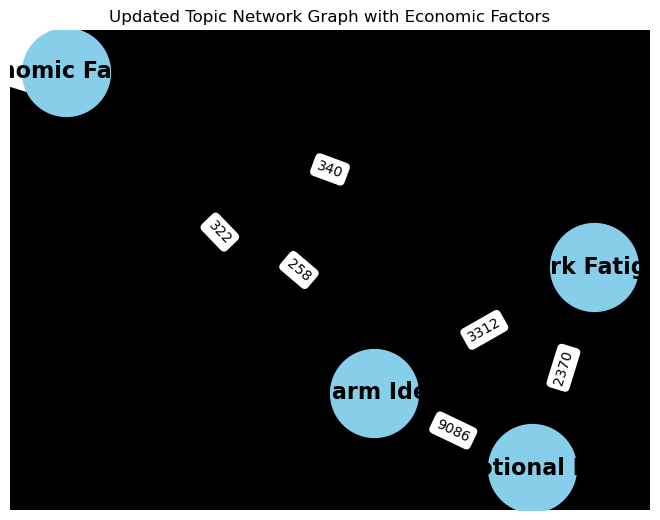

In [58]:
# Add "Economic Factors" as a node
G.add_node('Economic Factors')

# Update edges based on co-occurrence in the same tweet
for index, row in depressive_tweets.iterrows():
    topics = []
    if row['dominant_topic'] == 3:
        topics.append('Work Fatigue')
    if row['self_harm_keywords']:
        topics.append('Self-Harm Ideation')
    if row['emotional_pain_keywords']:
        topics.append('Emotional Pain')
    if row['economic_keywords']:
        topics.append('Economic Factors')
    
    for i in range(len(topics)):
        for j in range(i + 1, len(topics)):
            if G.has_edge(topics[i], topics[j]):
                G[topics[i]][topics[j]]['weight'] += 1
            else:
                G.add_edge(topics[i], topics[j], weight=1)

# Draw the updated graph
pos = nx.spring_layout(G, k=1.5)  # Adjust layout for better spacing
weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]  # Scale up edge thickness for visibility

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=16, font_weight='bold', width=weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, font_size=10)

plt.title('Updated Topic Network Graph with Economic Factors')
plt.show()

In [59]:
# Calculate Pearson correlation coefficients
pearson_corr = depressive_tweets[['economic_keywords', 'work_fatigue', 'emotional_pain', 'self_harm_ideation']].corr(method='pearson')
print("Pearson correlation coefficients:")
print(pearson_corr)

# Calculate Spearman correlation coefficients
spearman_corr = depressive_tweets[['economic_keywords', 'work_fatigue', 'emotional_pain', 'self_harm_ideation']].corr(method='spearman')
print("\nSpearman correlation coefficients:")
print(spearman_corr)

Pearson correlation coefficients:
                    economic_keywords  work_fatigue  emotional_pain  \
economic_keywords            1.000000      0.000550        0.014740   
work_fatigue                 0.000550      1.000000       -0.097534   
emotional_pain               0.014740     -0.097534        1.000000   
self_harm_ideation           0.027919     -0.059908        0.472093   

                    self_harm_ideation  
economic_keywords             0.027919  
work_fatigue                 -0.059908  
emotional_pain                0.472093  
self_harm_ideation            1.000000  

Spearman correlation coefficients:
                    economic_keywords  work_fatigue  emotional_pain  \
economic_keywords            1.000000      0.000550        0.014740   
work_fatigue                 0.000550      1.000000       -0.097534   
emotional_pain               0.014740     -0.097534        1.000000   
self_harm_ideation           0.027919     -0.059908        0.472093   

             